In [2]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read dataset
df = pd.read_csv('dataset/heart disease classification dataset.csv')

In [5]:

# check the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [6]:

# check for null values

df.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [7]:

# percent
df.isnull().sum()/len(df)*100

Unnamed: 0    0.000000
age           0.000000
sex           0.000000
cp            0.000000
trestbps      1.320132
chol          0.330033
fbs           0.000000
restecg       0.000000
thalach       1.650165
exang         0.000000
oldpeak       0.000000
slope         0.000000
ca            0.000000
thal          0.000000
target        0.000000
dtype: float64

In [9]:

# delete null value
df.dropna(inplace=True)
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
5,5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,296,63,female,0,124.0,197.0,0,1,136.0,1,0.0,1,0,2,no
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no


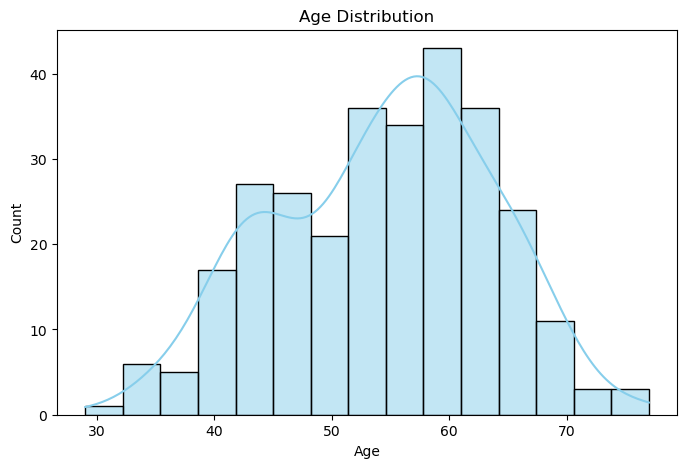

In [10]:

# distribution of ages : 

def plot_age_distribution():
    plt.figure(figsize=(8, 5))
    sns.histplot(df['age'], bins=15, kde=True, color="skyblue")
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()
    
plot_age_distribution()

/tmp/ipykernel_11040/2149453452.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sex'], palette="pastel")


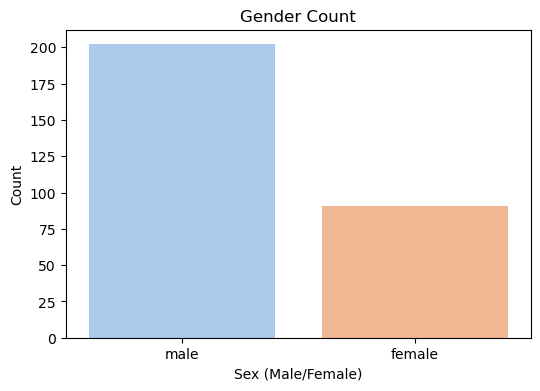

In [12]:
 
# plot stroke by gender

plt.figure(figsize=(6, 4))
sns.countplot(x=df['sex'], palette="pastel")
plt.title("Gender Count")
plt.xlabel("Sex (Male/Female)")
plt.ylabel("Count")
plt.show()


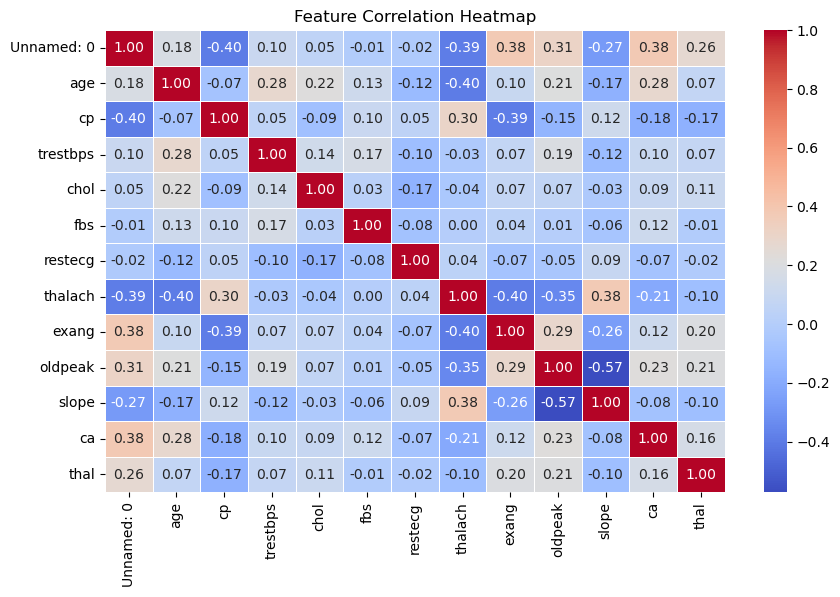

In [13]:

# correletion of heat map

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

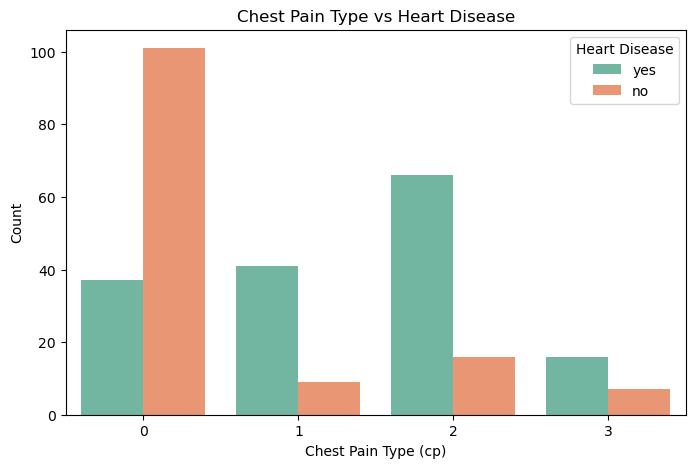

In [14]:

# Stroke proportion by work-type
plt.figure(figsize=(8, 5))
sns.countplot(x=df['cp'], hue=df['target'], palette="Set2")
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()

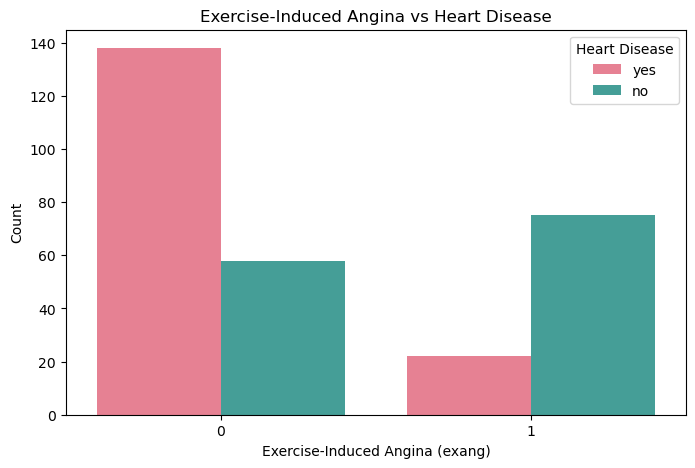

In [15]:

# Smoking status vs Stroke
plt.figure(figsize=(8, 5))
sns.countplot(x=df['exang'], hue=df['target'], palette="husl")
plt.title("Exercise-Induced Angina vs Heart Disease")
plt.xlabel("Exercise-Induced Angina (exang)")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()

/tmp/ipykernel_11040/2358547951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['target'], y=df['chol'], palette="coolwarm")


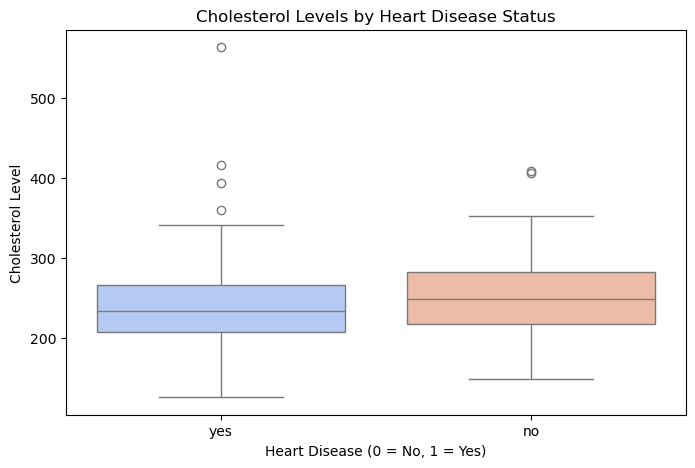

In [16]:

# Boxplot of cholesterol levels by heart disease status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['target'], y=df['chol'], palette="coolwarm")
plt.title("Cholesterol Levels by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol Level")
plt.show()

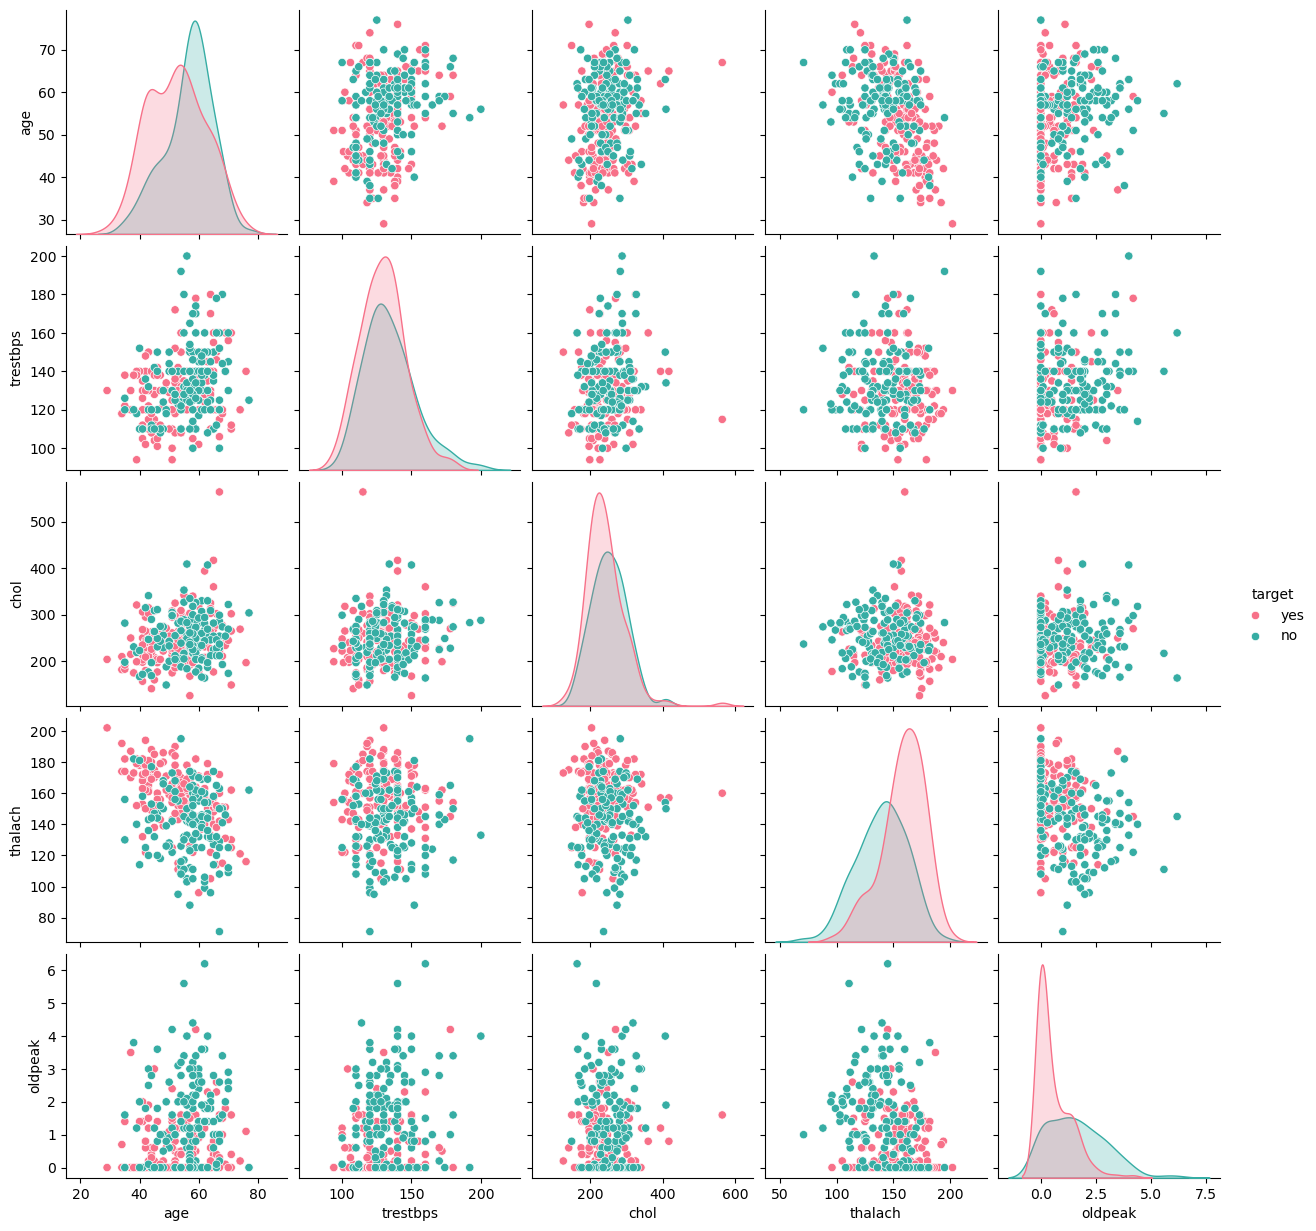

In [17]:

# Pairplot for key numerical features
sns.pairplot(df, hue="target", vars=["age", "trestbps", "chol", "thalach", "oldpeak"], palette="husl")
plt.show()